## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [680]:
# Импортируем библиотеку pyplot

import matplotlib.pyplot as plt

In [681]:
# Импортируем библиотеку pandas
# Читаем файлы csv

import pandas as pd

df_movies = pd.read_csv('/Users/danil/Desktop/Data Science/Яндекс Практикум Data Science/3/02 Сборный проект - 1/03 Проектная работа/mkrf_movies.csv')
display(df_movies.info())

df_shows = pd.read_csv('/Users/danil/Desktop/Data Science/Яндекс Практикум Data Science/3/02 Сборный проект - 1/03 Проектная работа/mkrf_shows.csv')
display(df_shows.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

In [682]:
df_movies['puNumber'] = df_movies['puNumber'].replace('нет', 0)

In [683]:
# Меняем тип данных столбца, чтобы соеденить таблицы
# Соеденяем при помощи merge

df_movies['puNumber'] = df_movies['puNumber'].astype(int, errors='raise')
df = df_movies.merge(df_shows, on='puNumber', how='left')

In [684]:
# Выводим первые 5 строк совместной таблици

df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [685]:
# Смотрим информацию

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [686]:
# Смотрим колличество пропущенных значений в столбцах

df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [687]:
# Смотрим колличество дубликатов

df.duplicated().sum()

0

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [688]:
# Проверяем типы данных

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

<div class="alert alert-block alert-info">
    <ul type='circle'>

Есть столбцы с неправильными типами данных, которые изменили:

1. show_start_date: object → datetime – столбец дат 
2. refundable_support: object → float64 – числовое занчение
3. nonrefundable_support: object → float64 – числовое занчение
4. budget: object → float64 – числовое занчение    
5. ratings: object → float64 – числовое занчение с десятичной дробью

In [689]:
# В столбце ratings есть разные форматы значений 
# которые нужно привести к одному

df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [690]:
# Меняем проценты на десятичную дробь

for idx, i in enumerate(df['ratings']):
    if '%' in str(i):
        if len(i) == 3:
            df['ratings'][idx] = i[:1] + '.' + i[1:2]

/var/folders/r8/f9pnzbcd4rq_1f11k5rtm6w40000gn/T/ipykernel_9532/1431833209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratings'][idx] = i[:1] + '.' + i[1:2]


In [691]:
# Изменяем неправильные типы данных в коллонках:

df['ratings'] = df['ratings'].astype(float)
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%d')

to_int = [
    'refundable_support', 'nonrefundable_support', 'budget'
]

for column in to_int:
    df[column] = df[column].astype(float)

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [692]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

<div class="alert alert-block alert-info">
    <ul type='circle'>

Заменим пропуски не получится. Например нули в гос поддержке собьют статистику, когда будем считать сколько в среднем госудраство выделает на кино.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [693]:
df.duplicated().sum()

0

<div class="alert alert-block alert-info">
    <ul type='circle'>

Дубликаты есть. Один и тот же фильм в таблице может иметь несколько прокатных удостоверений, поэтому мы не сможем найти их с помощью функции duplicated(). 
        
Новое удостоверение выдают, если в фильме были изменения. Тем не менее фильм остается тот же, и нам не нужны его дубли.

In [694]:
# Удаляем дубликаты по называнию фильмов в столбце title

df = df.drop_duplicates(subset='title', keep="first").reset_index(drop=True)

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [695]:
# Смотрим категории в столбце title

df['title'].sort_values().unique().tolist()

[' Я ПРЕПОД',
 '"SOS" над тайгой',
 '"V" значит вендетта',
 '"АРТиШОК" анимационный альманах авторских фильмов',
 '"Бежин луг" Сергея Эйзенштейна',
 '"Державная" Размышления 100 лет спустя',
 '"Зеленое яблоко" анимационный альманах выпуск № 7',
 '"Машины песенки". Серия "Опять Новый Год!"',
 '"Море"',
 '"Сезон дождей", "Диета Матроскина", "Шарик хочет телефон" из анимационного сериала "Простоквашино"',
 '"Старый" Новый год',
 '"Уорнер Бразерс Пикчерз" и "Леджендари Пикчерз": Тихоокеанский рубеж',
 '"Фееринки". Серия "Фантик спешит на помощь"',
 '"Хороший день", "Бог из машины/Deus EX", "Голод", "Психотроника", "Темная ночь"',
 '"Чудовище из Простоквашино", "Ген героя", "Ненастоящий детектив", "Мама и Тама", "Как бы не стало зимы" из анимационного сериала "Простоквашино"',
 '#ВСЁ_ИСПРАВИТЬ!?!',
 '#Москва-Руаян',
 '#ЯВОЛОНТЕР Истории неравнодушных',
 '(Не)жданный принц',
 '(Не)идеальный мужчина',
 '... в стиле JAZZ',
 '... и я там был',
 '... имени Сергея Герасимова',
 '007 Координаты Ск

In [696]:
# Смотрим категории в столбце type

df['type'].sort_values().unique().tolist()

[' Анимационный',
 ' Художественный',
 'Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный']

In [697]:
# Смотрим категории в столбце film_studio

df['film_studio'].sort_values().unique().tolist()

[' АНО "Кинофорум"',
 ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
 ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
 ' Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм ',
 ' ООО "АВАТАРА"',
 ' ООО "КОСТАФИЛЬМ"',
 ' ООО "КиноФирма"',
 ' ООО "Кинокомпания "Студия ПРЕССИНГ"',
 ' ООО "Магнум-фильм"',
 ' ООО "Продюсерская фирма Игоря Толстунова"',
 ' ООО "Студия "Рой"',
 ' ООО "Студия 25", ООО "Медиа Арт Студио", ООО "Продюсерский центр "Синема Продакшн" ',
 ' ООО "Студия МЕТРАФИЛЬМС", Компания "TASSE film", Компания "SIRENA film"',
 ' ООО "ТаББаК"',
 ' ООО "ТаББаК", ООО "Анимационная студия "Москва"',
 ' ООО "ТаББаК", ООО "Весёлая Компания"',
 ' ООО "Форс Медиа"',
 ' ООО "Хардкор", ООО "Патриот продакшнс"',
 ' ООО "Энджой мувиз"',
 ' ООО "Энджой мувиз", ООО "Эмоушен Пикчерз", ООО "РЕНОВАЦИО интертейнмент"',
 ' ООО Продюсерский центр "Фёдор Добронравов"',
 ' Юниверсал Пикчерз',


In [698]:
# Смотрим категории в столбце production_country

df['production_country'].sort_values().unique().tolist()

[' СССР',
 ' СССР ',
 ' СССР   ',
 '2019',
 'CША',
 'Австралия',
 'Австралия - Великобритания - Бельгия - Индия',
 'Австралия - Германия',
 'Австралия - Ирландия',
 'Австралия - Колумбия',
 'Австралия - США',
 'Австралия, Канада',
 'Австралия, США',
 'Австралия-Великобритания',
 'Австралия-Ирландия',
 'Австралия-США',
 'Австралия-Турция-США',
 'Австрия',
 'Австрия - Германия',
 'Австрия - Германия - Франция',
 'Австрия - Люксембург',
 'Австрия, Великобритания, Германия',
 'Австрия-Германия-Франция',
 'Австрия-Франция-Германия',
 'Азербайджан-Россия',
 'Аргентина',
 'Аргентина - Бразилия',
 'Аргентина - Испания',
 'Аргентина - Испания - Уругвай',
 'Аргентина - Мексика - Бразилия - Франция - США',
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
 'Аргентина - Франция - Испания',
 'Аргентина, Испания',
 'Аргентина-Испания',
 'Армения',
 'Армения - Германия',
 'Армения - Казахстан',
 'Армения-Россия',
 'Бельгия',
 'Бельгия - Германия - Люксембург',
 'Бельгия - Германия - 

In [699]:
df['director'].sort_values().unique().tolist()

[' Йохан Нийенхейс',
 ' Н.Орлов, Р.Быков',
 ' Р.Асхаев',
 ' Т.Саакян',
 'Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)',
 'А.Алов, В.Наумов',
 'А.Аманшаев, Г.Шенгелия',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян, В.Рейнгеверц',
 'А.Андрианов',
 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано ',
 'А.Анненский',
 'А.Аравин',
 'А.Аравин, А.Прошкин',
 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс,  Лу Хаму-Лхад, П.Осборн, Т.Ушев',
 'А.Артамонова',
 'А.Арутюнов',
 'А.Арутюнян, А.Коршунов',
 'А.Атанесян',
 'А.Бадягина',
 'А.Бажанов',
 'А.Балабанов',
 'А.Балахонов',
 'А.Бальчев',
 'А.Баранов',
 'А.Баршак',
 'А.Барщевский, И.Матвеев',
 'А.Барыкин',
 'А.Басаев',
 'А.Басов',
 'А.Безру

In [700]:
df['producer'].sort_values().unique().tolist()

[' А.Шальопа',
 ' Г.Шпригов',
 ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
 ' И.Гелашвили',
 ' К.Шахназаров, А.Златопольский',
 ' Мишель Чиджик, Джефф Абберли, Натали Марисано',
 ' ООО "Арт Пикчерс Студия"',
 ' ООО "Арт Пикчерс Студия", ФГУП "ВГТРК"',
 ' ООО "КиноФирма"',
 ' ФГУП "Киноконцерн "Мосфильм"',
 '"Фонд Михаила Калатозова"',
 'Ёсиаки Нисимура, Джеффри Уэкслер',
 'А. Калюжный',
 'А. Натахин',
 'А.А.Эшпай',
 'А.Аболс',
 'А.Адамская',
 'А.Адраникян, В.Горяинов',
 'А.Ананикян',
 'А.Ананикян, Г.Андреасян, С.Андреасян',
 'А.Ананикян, С.Андреасян, Г.Андреасян',
 'А.Аствацатрян, С.Сельянов',
 'А.Атанесян, А.Кириллин, Л.Тарасов',
 'А.Атанесян, М.Бабаханов, Р.Бутко',
 'А.Атанесян, Р.Атоян',
 'А.Балашов',
 'А.Барыкин',
 'А.Барыкин, В.Братухин, О.Суров',
 'А.Басов',
 'А.Белов',
 'А.Берденников',
 'А.Бессчетнова, М.Евдокимова, А.Куренков',
 'А.Бзаров',
 'А.Бик, П.Бранкати, Ф.Будвег, М.де Конинг, П.А.Марион, Г.Мендеш, М.Ситер, ',
 'А.Б

In [701]:
df['age_restriction'].sort_values().unique().tolist()

['«0+» - для любой зрительской аудитории',
 '«12+» - для детей старше 12 лет',
 '«16+» - для детей старше 16 лет',
 '«18+» - запрещено для детей',
 '«6+» - для детей старше 6 лет']

In [702]:
df['genres'].sort_values().unique().tolist()

['аниме,мультфильм',
 'аниме,мультфильм,боевик',
 'аниме,мультфильм,детектив',
 'аниме,мультфильм,драма',
 'аниме,мультфильм,комедия',
 'аниме,мультфильм,короткометражка',
 'аниме,мультфильм,мелодрама',
 'аниме,мультфильм,приключения',
 'аниме,мультфильм,ужасы',
 'аниме,мультфильм,фантастика',
 'аниме,мультфильм,фэнтези',
 'биография',
 'биография,военный,драма',
 'биография,документальный',
 'биография,драма',
 'биография,драма,военный',
 'биография,драма,история',
 'биография,драма,криминал',
 'биография,история',
 'биография,история,драма',
 'биография,криминал,драма',
 'биография,криминал,триллер',
 'биография,мелодрама,драма',
 'биография,музыка,драма',
 'биография,музыка,мюзикл',
 'биография,спорт,драма',
 'биография,спорт,история',
 'биография,спорт,комедия',
 'боевик',
 'боевик,вестерн,приключения',
 'боевик,военный',
 'боевик,военный,драма',
 'боевик,военный,история',
 'боевик,детектив',
 'боевик,драма',
 'боевик,драма,биография',
 'боевик,драма,вестерн',
 'боевик,драма,военны

In [703]:
df['financing_source'].sort_values().unique().tolist()

['Министерство культуры', 'Министерство культуры, Фонд кино', 'Фонд кино', nan]

<div class="alert alert-block alert-info">
    <ul type='circle'>

Почти во всех категориальных столбцах есть лишние пробелы или символы из-за которых образуются дубли.
        
Так же добавим в возрастной рейтинг порядковый номер, чтобы далее его можно было упорядочить для анализа.

In [704]:
# Создадим список из категориальных столбцов
# и с помощью функции str.strip() удалим лишние пробелы и символы

categories_list = [
    'title', 'type', 'film_studio', 'production_country', 
    'director', 'producer', 'genres'
]

for i in categories_list:
    df[i] = df[i].str.strip(' .')

In [705]:
# В столбце стран производства меняем '-' на ',' 
# чтобы привести все строки к одному виду и избавиться от дуюлей

df['production_country'] = df['production_country'].str.replace(' -', ',')
df['production_country'] = df['production_country'].str.replace('-', ', ')

In [706]:
# Проверяем появились ли дубликаты

df.duplicated().sum()

0

In [707]:
for idx, i in enumerate(df['age_restriction']):
    if '«6' in i:
        df['age_restriction'][idx] = '1'+i

/var/folders/r8/f9pnzbcd4rq_1f11k5rtm6w40000gn/T/ipykernel_9532/2612665920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_restriction'][idx] = '1'+i


#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [708]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,1«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,1«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
4,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0


In [709]:
df['puNumber'].sort_values().unique().tolist()

[0,
 1811096,
 111000110,
 111000111,
 111000112,
 111000113,
 111000114,
 111000115,
 111000116,
 111000117,
 111000118,
 111000119,
 111000210,
 111000211,
 111000212,
 111000213,
 111000214,
 111000215,
 111000216,
 111000217,
 111000218,
 111000219,
 111000310,
 111000311,
 111000312,
 111000313,
 111000314,
 111000315,
 111000317,
 111000318,
 111000319,
 111000410,
 111000411,
 111000412,
 111000413,
 111000414,
 111000415,
 111000416,
 111000417,
 111000418,
 111000419,
 111000510,
 111000511,
 111000512,
 111000513,
 111000514,
 111000515,
 111000516,
 111000517,
 111000518,
 111000519,
 111000610,
 111000611,
 111000612,
 111000613,
 111000614,
 111000615,
 111000616,
 111000617,
 111000618,
 111000619,
 111000710,
 111000711,
 111000712,
 111000714,
 111000715,
 111000716,
 111000717,
 111000718,
 111000719,
 111000810,
 111000811,
 111000812,
 111000814,
 111000815,
 111000816,
 111000818,
 111000819,
 111000910,
 111000911,
 111000912,
 111000913,
 111000914,
 111000915,
 1

In [710]:
df['refundable_support'].sort_values().unique().tolist()

[0.0,
 3500000.0,
 5000000.0,
 7000000.0,
 7153119.0,
 7346881.0,
 8000000.0,
 9000000.0,
 10000000.0,
 15000000.0,
 17000000.0,
 19000000.0,
 20000000.0,
 25000000.0,
 26000000.0,
 28000000.0,
 29000000.0,
 30000000.0,
 35000000.0,
 36000000.0,
 38000000.0,
 40000000.0,
 41000000.0,
 44000000.0,
 50000000.0,
 55000000.0,
 60000000.0,
 75000000.0,
 80000000.0,
 100000000.0,
 110000000.0,
 115000000.0,
 150000000.0,
 180000000.0,
 nan]

In [711]:
df['nonrefundable_support'].sort_values().unique().tolist()

[0.0,
 3000000.0,
 4700000.0,
 5000000.0,
 5300000.0,
 6000000.0,
 8000000.0,
 10000000.0,
 11520000.0,
 15000000.0,
 20000000.0,
 20145285.0,
 21700000.0,
 22904000.0,
 23000000.0,
 24000000.0,
 24450000.0,
 24500000.0,
 24986000.0,
 25000000.0,
 25200000.0,
 25345000.0,
 25500000.0,
 25900000.0,
 26000000.0,
 26500000.0,
 26950000.0,
 27000000.0,
 27500000.0,
 27510000.0,
 28000000.0,
 28500000.0,
 29000000.0,
 30000000.0,
 30123915.0,
 31000000.0,
 34000000.0,
 35000000.0,
 37000000.0,
 40000000.0,
 41500000.0,
 45000000.0,
 46502299.0,
 50000000.0,
 50000866.0,
 51000000.0,
 55000000.0,
 56579055.0,
 59000000.0,
 60000000.0,
 64000000.0,
 70000000.0,
 75000000.0,
 80000000.0,
 85000000.0,
 90000000.0,
 97000000.0,
 100000000.0,
 107847945.0,
 110000000.0,
 120000000.0,
 130000000.0,
 133000000.0,
 138969465.0,
 140000000.0,
 150000000.0,
 175000000.0,
 190000000.0,
 200000000.0,
 225000000.0,
 250000000.0,
 260000000.0,
 300000000.0,
 392104482.0,
 400000000.0,
 nan]

In [712]:
df['budget'].sort_values().unique().tolist()

[0.0,
 14462464.0,
 15010000.0,
 18166418.0,
 18706080.0,
 27000000.0,
 28115580.0,
 28571429.0,
 30000000.0,
 30448911.0,
 30800000.0,
 31305313.0,
 33000000.0,
 35000000.0,
 35296950.0,
 35714286.0,
 35760060.0,
 36016269.0,
 36259500.0,
 37000990.0,
 37142857.0,
 37371262.0,
 37424796.0,
 37500000.0,
 37600000.0,
 37744280.0,
 37765654.0,
 37849103.0,
 37878787.0,
 37889165.0,
 37943652.0,
 38000000.0,
 38440000.0,
 38461538.0,
 38466700.0,
 38476869.0,
 38500000.0,
 38858260.0,
 39000000.0,
 39057971.0,
 39129289.0,
 39700000.0,
 39990000.0,
 40000000.0,
 40015122.0,
 40265000.0,
 40287770.0,
 40500000.0,
 40574140.0,
 40600800.0,
 41000000.0,
 41497860.0,
 41998984.0,
 42000000.0,
 42252509.0,
 42860000.0,
 43000000.0,
 44286584.0,
 44600000.0,
 45006609.0,
 45045050.0,
 45050000.0,
 45074547.0,
 45483233.0,
 45538655.0,
 46153846.0,
 46153887.0,
 46154000.0,
 46160000.0,
 46195427.0,
 46200000.0,
 46300000.0,
 46657311.0,
 46923776.0,
 46941140.0,
 46968883.0,
 47200000.0,
 47328

In [713]:
df['ratings'].sort_values().unique().tolist()

[1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.1,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 6.9,
 7.0,
 7.1,
 7.2,
 7.3,
 7.4,
 7.5,
 7.6,
 7.7,
 7.8,
 7.9,
 8.0,
 8.1,
 8.2,
 8.3,
 8.4,
 8.5,
 8.6,
 8.7,
 8.8,
 8.9,
 9.0,
 9.1,
 9.2,
 9.4,
 9.7,
 9.8,
 9.9,
 nan]

In [714]:
df['box_office'].sort_values().unique().tolist()

[0.0,
 40.0,
 50.0,
 75.0,
 80.0,
 100.0,
 115.0,
 120.0,
 125.0,
 130.0,
 150.0,
 165.0,
 170.0,
 180.0,
 200.0,
 225.0,
 235.0,
 240.0,
 250.0,
 260.0,
 295.0,
 300.0,
 330.0,
 340.0,
 350.0,
 360.0,
 370.0,
 380.0,
 400.0,
 405.0,
 420.0,
 425.0,
 450.0,
 460.0,
 465.0,
 480.0,
 490.0,
 500.0,
 520.0,
 540.0,
 550.0,
 560.0,
 580.0,
 585.0,
 600.0,
 620.0,
 650.0,
 660.0,
 680.0,
 690.0,
 710.0,
 720.0,
 735.0,
 740.0,
 750.0,
 760.0,
 765.0,
 775.0,
 780.0,
 785.0,
 830.0,
 850.0,
 860.0,
 865.0,
 880.0,
 895.0,
 900.0,
 930.0,
 940.0,
 950.0,
 960.0,
 980.0,
 1000.0,
 1010.0,
 1020.0,
 1030.0,
 1040.0,
 1050.0,
 1070.0,
 1075.0,
 1090.0,
 1100.0,
 1110.0,
 1140.0,
 1149.0,
 1150.0,
 1165.0,
 1188.0,
 1190.0,
 1200.0,
 1230.0,
 1240.0,
 1260.0,
 1270.0,
 1290.0,
 1300.0,
 1360.0,
 1365.0,
 1400.0,
 1420.0,
 1440.0,
 1460.0,
 1500.0,
 1525.0,
 1540.0,
 1550.0,
 1570.0,
 1580.0,
 1585.0,
 1590.0,
 1600.0,
 1630.0,
 1657.0,
 1660.0,
 1680.0,
 1700.0,
 1710.0,
 1740.0,
 1790.0,
 1795.0

<div class="alert alert-block alert-info">
    <ul type='circle'>

Никаких проблем не видно. 
        
Поделим все денежные категории на 1 млн, чтобы работать с небольшими числами

In [715]:
# Создадим список денежных категорий и поделим его на 1 млн

cash_list = [
    'refundable_support', 'nonrefundable_support', 
    'budget', 'box_office'
]

for i in cash_list:
    df[i] = df[i] / 1000000

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [716]:
# Создаем столбец с информацией о годе проката

df['year_of_show'] = df['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [717]:
# Создаем список с режисерами и жанрами.
# Делаем цикл в цикле, и создаем 2 новых столбца 
# с главными режисерами и жанрами

columns_list = [
    'director', 'genres',
]

for i in columns_list:
    df['main_' + i] = df[i]
    for idx, j in enumerate(df['main_' + i]):
        df['main_' + i][idx] = str(j).partition(',')[0]

/var/folders/r8/f9pnzbcd4rq_1f11k5rtm6w40000gn/T/ipykernel_9532/3626436813.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['main_' + i][idx] = str(j).partition(',')[0]
/var/folders/r8/f9pnzbcd4rq_1f11k5rtm6w40000gn/T/ipykernel_9532/3626436813.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['main_' + i][idx] = str(j).partition(',')[0]


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [718]:
# Считаем долю государственной поддержки от общего бюджета фильма

df['share_of_government_support'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

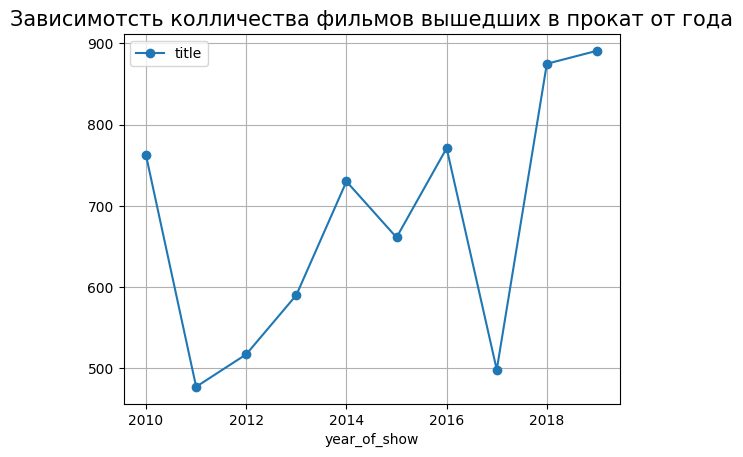

In [719]:
# Смотрим, сколько фильмов выходило в прокат каждый год.

shows_per_year = df.pivot_table(index='year_of_show', values='title', aggfunc='count')

shows_per_year.plot(y='title', style='o-', grid=True)
plt.title('Зависимотсть колличества фильмов вышедших в прокат от года', fontsize=15)
plt.show()

# corr_shows_per_year = df['year_of_show'].corr(df['title'].count())
# print(f'Корреляции Пирсона: {corr_shows_per_year}')

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

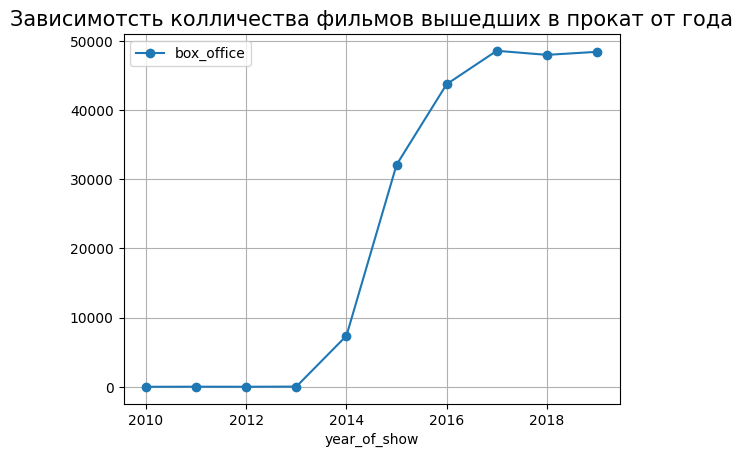

Корреляции Пирсона: 0.1446211945070748


In [720]:
# Смотрим, как менялась сумма сборов проката по годам.

box_office_per_year = df.pivot_table(index='year_of_show', values='box_office', aggfunc='sum')

box_office_per_year.plot(y='box_office', style='o-', grid=True)
plt.title('Зависимотсть колличества фильмов вышедших в прокат от года', fontsize=15)
plt.show()

corr_box_office_per_year = df['year_of_show'].corr(df['box_office'])
print(f'Корреляции Пирсона: {corr_box_office_per_year}')

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [721]:
# Смотрим среднюю и медианную сумму сборов для каждого года.

box_office_median_per_year = df.pivot_table(index='year_of_show', values='box_office', aggfunc=['mean', 'median'])
box_office_median_per_year

,mean,median
,box_office,box_office
year_of_show,,
2010,0.026981,0.001868
2011,0.142290,0.003043
2012,0.055734,0.006693
2013,0.169139,0.003565
2014,28.687154,0.022490
2015,74.442343,4.327266
2016,87.288313,3.640802
2017,136.408860,10.177834


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

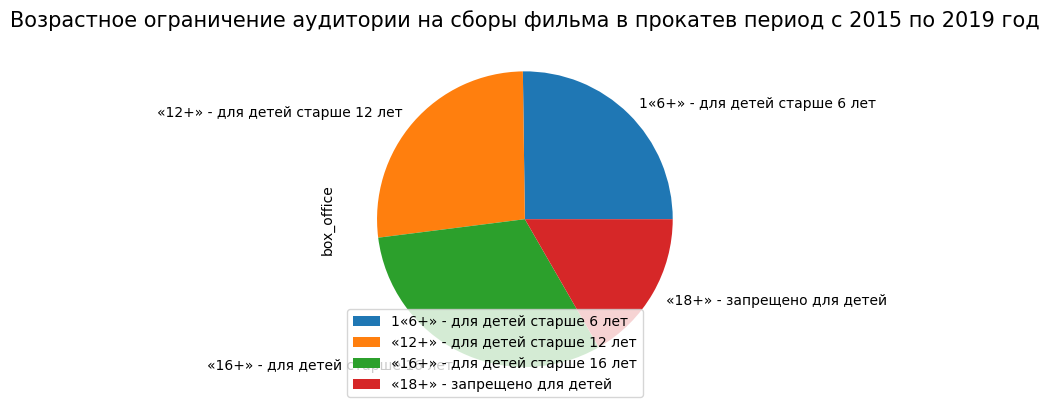

In [722]:
# Создадим список с возрастными ограничиниями
# Создадим сводную таблицу и круговую диограмму

age_list = [
    '1«6+» - для детей старше 6 лет',
    '«12+» - для детей старше 12 лет',
    '«16+» - для детей старше 16 лет',
    '«18+» - запрещено для детей'
]

box_office_per_age = (
    df.query('age_restriction in @age_list and 2015 <= year_of_show <= 2019')
    .pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
)

box_office_per_age.plot(y='box_office', kind='pie', grid=True)
plt.title('Возрастное ограничение аудитории на сборы фильма в прокате' 
          'в период с 2015 по 2019 год', fontsize=15)
plt.show()

<div class="alert alert-block alert-info">
    <ul type='circle'>

Больше всего фильмов вышло в прокат в 2019-м году. Меньше всего в 2011-м году. Корреляции не прослеживается.
        
Максимальная сумма сборов была в 2017-м. Минимальная в 2010-м году. Корреляции почти нет.
        
Средняя и медианная сумма сборов по каждому году отличается в разы в пользу среднего. Это говорит о том, что были кассовые фильмы которые взяли на себя большую часть выручки от всего проката.
        
Самыми кассовыми стали фильмы с рейтингом 16+. Самую меньшую долю занимают фильмы с рейтингом 18+. Логично, что чем ниже возрастной рейтинг, тем больше потенциальная аудитория. Однако блокбастеров разрешенных к показу до 16 лет не так много, поэтому категории 6+ и 12+ лет немного проседают относительно 16+. 
        
Зависимости сборов фильмов от года в сочетании с возрастным ограничением – нет. В каждом рейтинге есть свои просадки, но все они в разные года. 

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [725]:
# Создадим столбец с общим бюджетом государственной поддержки

df['support'] = df['refundable_support'] + df['nonrefundable_support']
df['support'].describe()

count    329.000000
mean      59.713338
std       68.888970
min        3.000000
25%       25.345000
50%       35.000000
75%       60.000000
max      500.000000
Name: support, dtype: float64

In [767]:
# Создаем отдельную таблицу с фильмами получившими гос поддержку

df_support = df.query('support == support')

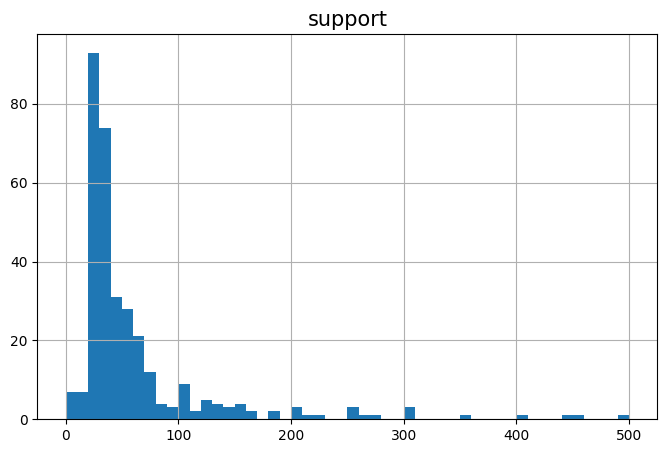

count    329.000000
mean      59.713338
std       68.888970
min        3.000000
25%       25.345000
50%       35.000000
75%       60.000000
max      500.000000
Name: support, dtype: float64


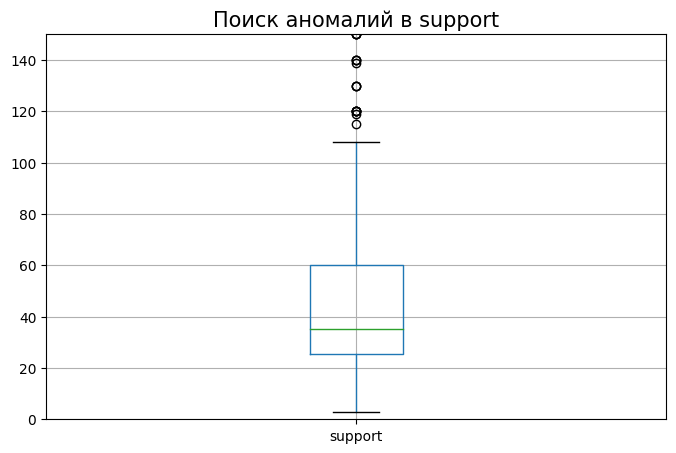

In [789]:
# Построим гистограмму государственной поддержки


df_support['support'].hist(bins=50, range = (0, df_support['support'].max()), figsize=(8, 5)) 
plt.title('support', fontsize=15)
plt.show()
print(df_support['support'].describe())

plt.figure(figsize=(8, 5))
df_support.boxplot(column='support')
plt.title(f'Поиск аномалий в support', fontsize=15)
plt.ylim(0, 150)
plt.show()  

In [776]:
# Создадим столбец окупаемости

df_support['payback'] = df_support['box_office'] - df_support['budget']

/var/folders/r8/f9pnzbcd4rq_1f11k5rtm6w40000gn/T/ipykernel_9532/3985375106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_support['payback'] = df_support['box_office'] - df_support['budget']


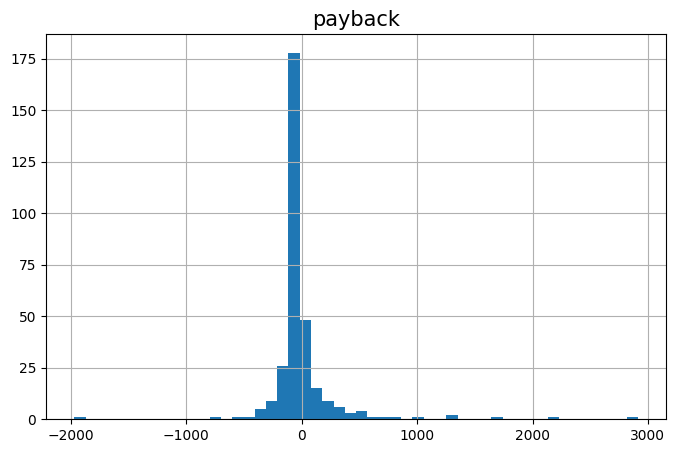

count     316.000000
mean        5.205385
std       319.982926
min     -1971.477243
25%       -70.050756
50%       -40.060257
75%         2.709907
max      2913.568691
Name: payback, dtype: float64


In [792]:
# Построим гистограмму государственной поддержки


df_support['payback'].hist(bins=50, range = (df_support['payback'].min(), df_support['payback'].max()), figsize=(8, 5)) 
plt.title('payback', fontsize=15)
plt.show()
print(df_support['payback'].describe())

In [808]:
# Сделаем сводную таблицу лучшей и худшей окупаемости

payback_best_pivot = df_support.pivot_table(index='title', values='payback', aggfunc='sum').sort_values(by='payback', ascending=False).head(10)
payback_worst_pivot = df_support.pivot_table(index='title', values='payback', aggfunc='sum').sort_values(by='payback', ascending=False).head(10)

In [809]:
# По сводным таблицам делаем срезы со всеми столбцами

payback_best = df_support.query('title in @payback_best_pivot.index')
payback_worst = df_support.query('title in @payback_worst_pivot.index')

In [812]:
# Сделаем 2 среза с окупившимися и не окупившимися фильмами

paid_off = df_support.query('payback >= 0')
didnt_paid_off = df_support.query('payback < 0')

In [826]:
# Посчитаем долю окупившихся фильмов

paid_off_percent = round(paid_off['title'].count() / df_support['title'].count(), 2)
print('Процент окупившихся фильмов: {:.0%}'.format(paid_off_percent))

Процент окупившихся фильмов: 25%


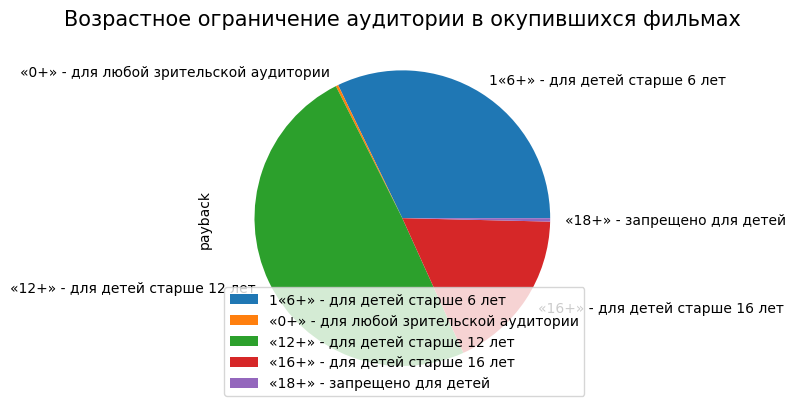

                                             payback
age_restriction                                     
1«6+» - для детей старше 6 лет           7327.479678
«0+» - для любой зрительской аудитории     61.000275
«12+» - для детей старше 12 лет         11245.592759
«16+» - для детей старше 16 лет          4069.292773
«18+» - запрещено для детей                83.667032


In [867]:
# Построим круговую диограмму возрастных ограничений аудитории

box_office_paid_off_per_age = (
    paid_off
    .pivot_table(index='age_restriction', values='payback', aggfunc='sum')
)

box_office_paid_off_per_age.plot(y='payback', kind='pie', grid=True)
plt.title('Возрастное ограничение аудитории в окупившихся фильмах', fontsize=15)
plt.show() 

print(box_office_paid_off_per_age)

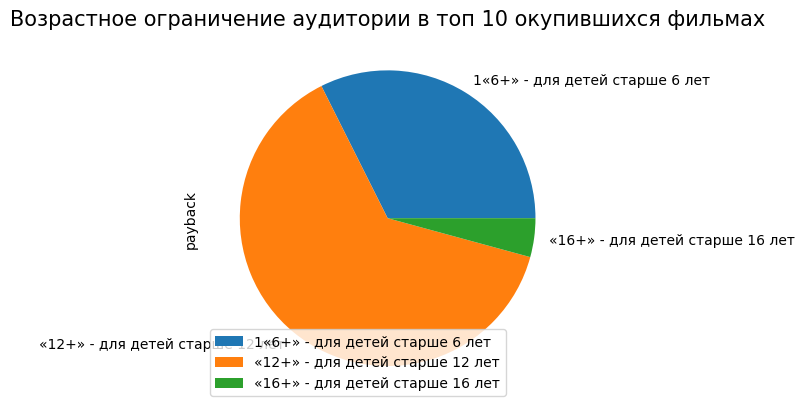

                                     payback
age_restriction                             
1«6+» - для детей старше 6 лет   4222.296984
«12+» - для детей старше 12 лет  8259.566156
«16+» - для детей старше 16 лет   552.409725


In [870]:
# Построим круговую диограмму возрастных ограничений аудитории
# среди топ 10 фильмов

ten_best_paid_off = (
    paid_off
    .pivot_table(index='title', values='payback', aggfunc='sum')
    .sort_values(by='payback', ascending=False).head(10)
)

ten_best_paid_off_per_age = (
    paid_off.query('title in @ten_best_paid_off.index')
    .pivot_table(index='age_restriction', values='payback', aggfunc='sum')
)

ten_best_paid_off_per_age.plot(y='payback', kind='pie', grid=True)
plt.title('Возрастное ограничение аудитории в топ 10 окупившихся фильмах', fontsize=15)
plt.show() 

print(ten_best_paid_off_per_age)

/var/folders/r8/f9pnzbcd4rq_1f11k5rtm6w40000gn/T/ipykernel_9532/1770995632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  didnt_paid_off['payback'] = didnt_paid_off['payback'] * -1


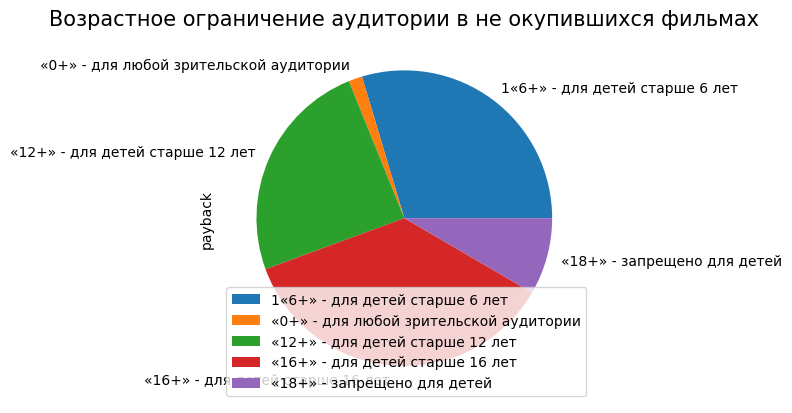

                                            payback
age_restriction                                    
1«6+» - для детей старше 6 лет          6264.394232
«0+» - для любой зрительской аудитории   314.746028
«12+» - для детей старше 12 лет         5177.514604
«16+» - для детей старше 16 лет         7611.130381
«18+» - запрещено для детей             1774.345457


In [856]:
# Построим круговую диограмму возрастных ограничений аудитории
# Среди не окупившихся фильмов

didnt_paid_off['payback'] = didnt_paid_off['payback'] * -1

worst_office_paid_off_per_age = (
    didnt_paid_off
    .pivot_table(index='age_restriction', values='payback', aggfunc='sum')
)

worst_office_paid_off_per_age.plot(y='payback', kind='pie', grid=True)
plt.title('Возрастное ограничение аудитории в не окупившихся фильмах', fontsize=15)
plt.show() 

print(worst_office_paid_off_per_age)

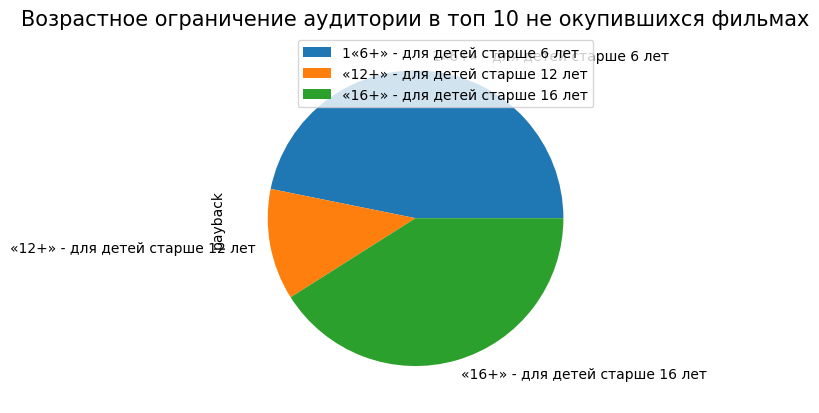

                                     payback
age_restriction                             
1«6+» - для детей старше 6 лет   2655.532942
«12+» - для детей старше 12 лет   689.718497
«16+» - для детей старше 16 лет  2326.236039


In [871]:
# Построим круговую диограмму возрастных ограничений аудитории
# среди худших по окупаимости 10 фильмов

ten_worst_paid_off = (
    didnt_paid_off
    .pivot_table(index='title', values='payback', aggfunc='sum')
    .sort_values(by='payback', ascending=False).head(10)
)

ten_worst_office_paid_off_per_age = (
    didnt_paid_off.query('title in @ten_worst_paid_off.index')
    .pivot_table(index='age_restriction', values='payback', aggfunc='sum')
)

ten_worst_office_paid_off_per_age.plot(y='payback', kind='pie', grid=True)
plt.title('Возрастное ограничение аудитории в топ 10 не окупившихся фильмах', fontsize=15)
plt.show() 

print(ten_worst_office_paid_off_per_age)

<div class="alert alert-block alert-info">
    <ul type='circle'>

Разброс государственной поддержки очень большой, от почти 3 до 500 млн. В основном фильмы получали 35 млн.
        
Не смотря на это, большинство фильмов ушли в минус на 40 млн по кассовым сборам. Из всех фильмов окупилось лишь 25%.
        
Почти половина аудитории окупившихся фильмов – категория 12+. Среди топ 10 по окупаемости фильмов – так же доминирует 12+, но занимает уже 64%.
        
Среди не окупившихся фильмов доли почти равномерно распределены между 3-я категориями: 6+, 12+ и 16+. Среди топ 10 по не окупаемости фильмов – 12+ и 16+ лидируют почти наравне, а за ними 6+.

### Шаг 5. Общий вывод

<div class="alert alert-block alert-info">
    <ul type='circle'>

Среди все фильмов есть кассовые гиганты, которые взяли на себя большую часть выручки от всего проката.
        
Среди всех, самыми кассовыми стали фильмы с рейтингом 16+. Самую меньшую долю занимают фильмы с рейтингом 18+.
        
Целых 75% фильмов из тех, что имели гос поддержку – провалились. Большинство их них ушли в минус на 40 млн.
        
Основная возрастная категория и в окупившихся и в провалившихся фильмах – 12+ лет. Однако в окупившихся, эта категория сильно доминирует, в то время как в провалившихся она идет наравне с 6+ и 12+.
        
Очевидно, что большинство фильмов спонсируемых государством – не интересны зрителю 